<a href="https://colab.research.google.com/github/lilythekids/DL_RNN/blob/main/DL_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM DETECTION**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
%matplotlib inline

from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
data  = pd.read_csv("/content/sample_data/SMSSpamCollection.tsv", sep="\t", names=["label", "body_text"], header=None)
data.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1BKHC11e5qh_jfENcHkGMPdc_p9OBhfFvN1SB9GlpWiM/edit#gid=0


In [18]:
texts = []
labels = []
for i, label in enumerate(data['label']):
    texts.append(data['body_text'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


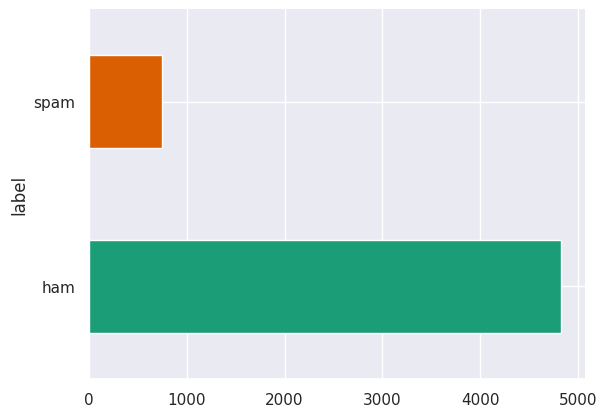

In [19]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
# number of words used as features
max_features = 10000 #word/vocab
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

True
The number of training 4457, validation 1115 


In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

Found 9009 unique words: 


In [22]:
data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

data shape:  (5572, 500)


In [23]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - acc: 0.8766 - loss: 0.3925 - val_acc: 0.8969 - val_loss: 0.2497
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - acc: 0.9732 - loss: 0.1029 - val_acc: 0.9765 - val_loss: 0.0813
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - acc: 0.9822 - loss: 0.0700 - val_acc: 0.9226 - val_loss: 0.2089
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - acc: 0.7574 - loss: 0.5151 - val_acc: 0.8991 - val_loss: 0.2794
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - acc: 0.9592 - loss: 0.1306 - val_acc: 0.9664 - val_loss: 0.1100
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - acc: 0.9872 - loss: 0.0493 - val_acc: 0.9798 - val_loss: 0.0715
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - acc: 0.9955 - loss: 0.0197 - val_acc: 0.9731 - val_loss: 0.0772
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - acc: 0.9972 - loss: 0.0163 - val_acc: 0.9854 - val_loss: 0.0522
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/ste

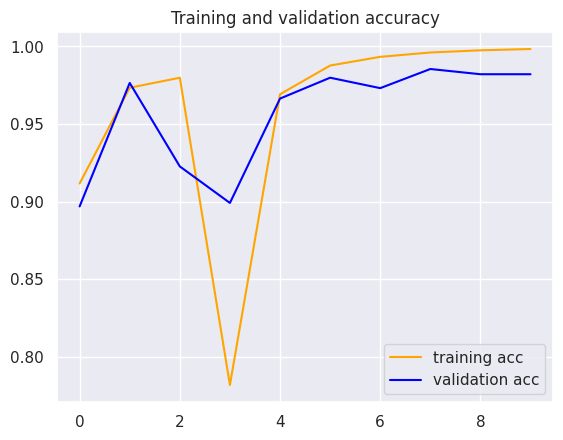

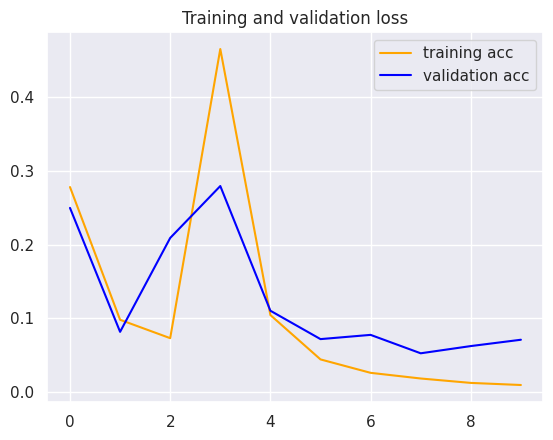

In [24]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
pred = model.predict(texts_test)
pred = pred.flatten()
print(pred.round(2))

acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict(texts_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
[0. 0. 0. ... 0. 0. 0.]
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9834 - loss: 0.0701
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [26]:
y_pred = np.where(pred > 0.5, 1, 0)
print(y_pred)

[0 0 0 ... 0 0 0]


In [27]:
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))


Test loss is 0.08 accuracy is 0.98  


In [28]:
print(confusion_matrix(y_pred, y_test))

[[958  18]
 [  3 136]]


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       961
           1       0.98      0.88      0.93       154

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# **LSTM**

In [30]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - acc: 0.8443 - loss: 0.4047 - val_acc: 0.9630 - val_loss: 0.1607
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - acc: 0.9736 - loss: 0.1228 - val_acc: 0.9787 - val_loss: 0.0831
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - acc: 0.9808 - loss: 0.0731 - val_acc: 0.9809 - val_loss: 0.0685
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - acc: 0.9857 - loss: 0.0563 - val_acc: 0.9899 - val_loss: 0.0495
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 287ms/step - acc: 0.9922 - loss: 0.0315 - val_acc: 0.9809 - val_loss: 0.0626
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - acc: 0.9935 - loss: 0.0204 - val_acc: 0.9877 - val_loss: 0.0523
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 277ms/step - acc: 0.9970 - loss: 0.0125 - val_acc: 0.9865 - val_loss: 0.0510
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - acc: 0.9971 - loss: 0.0149 - val_acc: 0.9843 - val_loss: 0.0646
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/

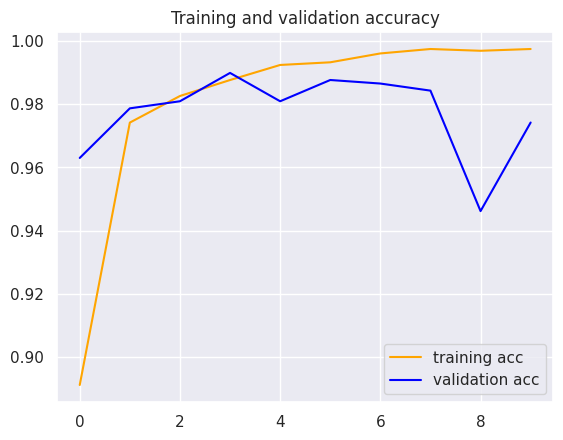

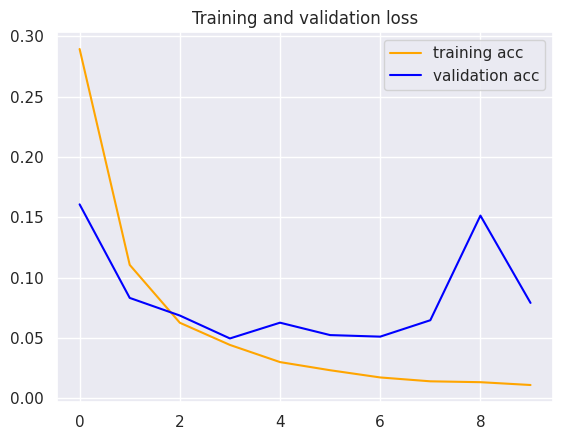

In [31]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
pred = model.predict(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - acc: 0.9848 - loss: 0.0690
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
Test loss is 0.10 accuracy is 0.98  


In [33]:
y_pred = np.where(pred > 0.5, 1, 0)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [34]:
print(confusion_matrix(y_pred, y_test))

[[945  10]
 [ 16 144]]


In [35]:
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

Test loss is 0.10 accuracy is 0.98  


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       961
           1       0.90      0.94      0.92       154

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

